In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

lam = 2
a = 2

mode_true = a
mean_true = a + 1/lam
median_true = a + np.log(2)/lam

def pdf(x):
    y = lam * np.exp(-lam * (x - a))
    y[x < a] = 0
    return y

print(f"Аналитические значения: Мода = {mode_true}, Среднее = {mean_true}, Медиана = {median_true}")

Аналитические значения: Мода = 2, Среднее = 2.5, Медиана = 2.3465735902799727


In [ ]:
n_big = 10000
n_small = 20
sample_big = a + np.random.exponential(scale=1/lam, size=n_big)
sample_small = a + np.random.exponential(scale=1/lam, size=n_small)

def get_estimates(sample):
    mode_val = mode(sample).mode
    mean_val = np.mean(sample)
    median_val = np.median(sample)
    return mode_val, mean_val, median_val

mode_b, mean_b, med_b = get_estimates(sample_big)
mode_s, mean_s, med_s = get_estimates(sample_small)

print("Большая выборка (n=10000):")
print(f"Мода: {mode_b:.3f}, Среднее: {mean_b:.3f}, Медиана: {med_b:.3f}")

print("Маленькая выборка (n=20):")
print(f"Мода: {mode_s:.3f}, Среднее: {mean_s:.3f}, Медиана: {med_s:.3f}")


Большая выборка (n=10000):
Мода: 2.000, Среднее: 2.509, Медиана: 2.353

Маленькая выборка (n=20):
Мода: 2.068, Среднее: 2.650, Медиана: 2.489


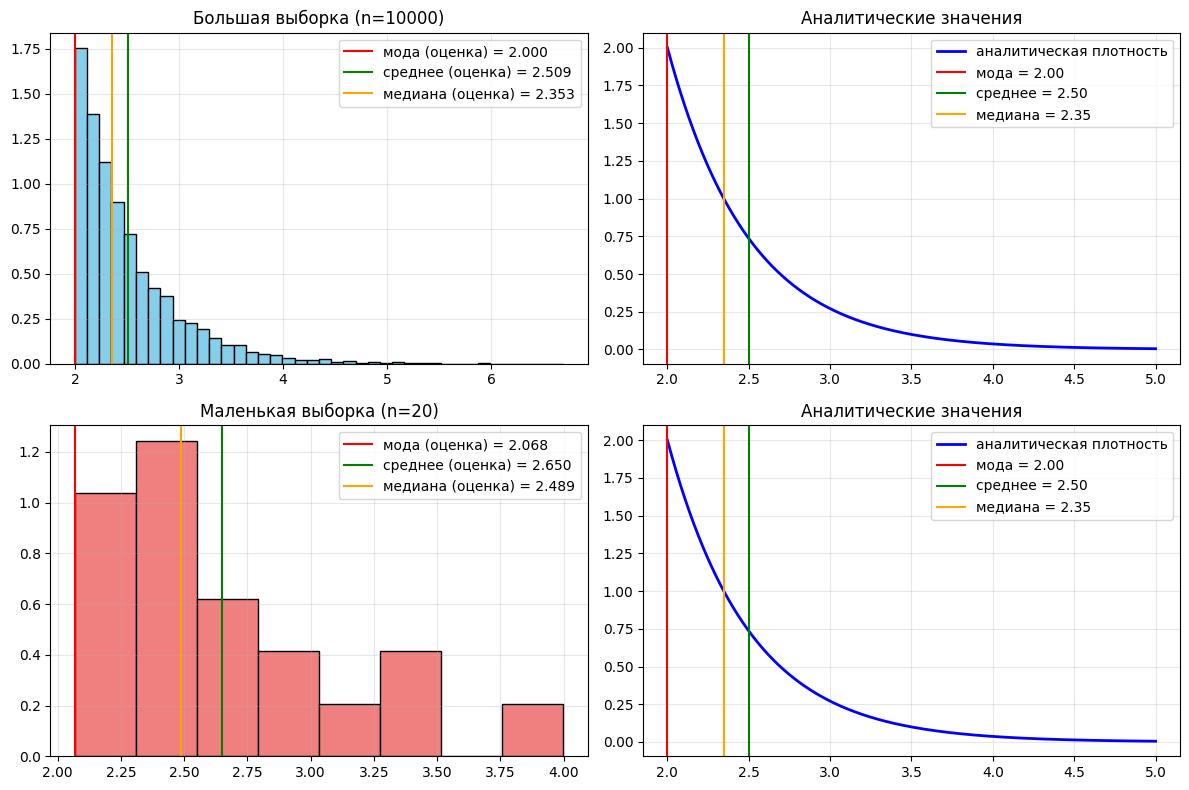

In [127]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

ax = axes[0, 0]
ax.hist(sample_big, bins=40, density=True, color='skyblue', edgecolor='k')
ax.axvline(mode_b, color='red', label=f"мода (оценка) = {mode_b:.3f}")
ax.axvline(mean_b, color='green', label=f"среднее (оценка) = {mean_b:.3f}")
ax.axvline(med_b, color='orange', label=f"медиана (оценка) = {med_b:.3f}")
ax.set_title(f"Большая выборка (n={n_big})")
ax.legend()
ax.grid(alpha=0.3)

ax = axes[0, 1]
xs = np.linspace(a, a+3, 1000)
ax.plot(xs, pdf(xs), color='blue', lw=2, label='аналитическая плотность')
ax.axvline(mode_true, color='red', label=f"мода = {mode_true:.2f}")
ax.axvline(mean_true, color='green', label=f"среднее = {mean_true:.2f}")
ax.axvline(median_true, color='orange', label=f"медиана = {median_true:.2f}")
ax.set_title(f"Аналитические значения")
ax.legend()
ax.grid(alpha=0.3)

ax = axes[1, 0]
ax.hist(sample_small, bins=8, density=True, color='lightcoral', edgecolor='k')
ax.axvline(mode_s, color='red', label=f"мода (оценка) = {mode_s:.3f}")
ax.axvline(mean_s, color='green', label=f"среднее (оценка) = {mean_s:.3f}")
ax.axvline(med_s, color='orange', label=f"медиана (оценка) = {med_s:.3f}")
ax.set_title(f"Маленькая выборка (n={n_small})")
ax.legend()
ax.grid(alpha=0.3)

ax = axes[1, 1]
xs = np.linspace(a, a+3, 1000)
ax.plot(xs, pdf(xs), color='blue', lw=2, label='аналитическая плотность')
ax.axvline(mode_true, color='red', label=f"мода = {mode_true:.2f}")
ax.axvline(mean_true, color='green', label=f"среднее = {mean_true:.2f}")
ax.axvline(median_true, color='orange', label=f"медиана = {median_true:.2f}")
ax.set_title(f"Аналитические значения")
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

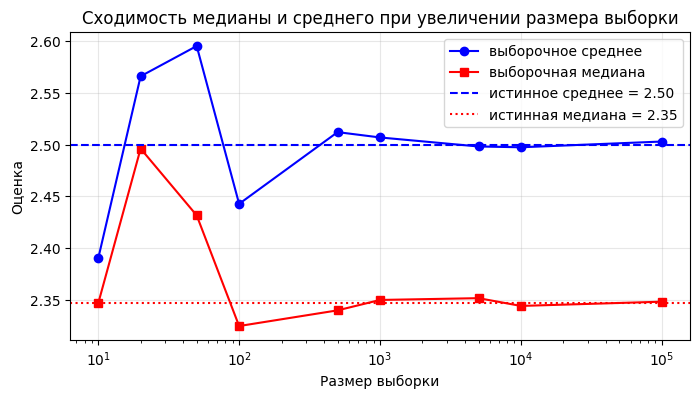

In [128]:
sizes = [10, 20, 50, 100, 500, 1000, 5000, 10000, 100000]
mean_estimates = []
median_estimates = []

for n in sizes:
    s = a + np.random.exponential(scale=1/lam, size=n)
    mean_estimates.append(np.mean(s))
    median_estimates.append(np.median(s))

plt.figure(figsize=(8,4))
plt.plot(sizes, mean_estimates, color='blue', marker='o', label='выборочное среднее')
plt.plot(sizes, median_estimates, color='red', marker='s', label='выборочная медиана')
plt.axhline(mean_true, color='blue', linestyle='--', label=f'истинное среднее = {mean_true:.2f}')
plt.axhline(median_true, color='red', linestyle=':', label=f'истинная медиана = {median_true:.2f}')
plt.xscale('log', base=10)
plt.xlabel("Размер выборки")
plt.ylabel("Оценка")
plt.title("Сходимость медианы и среднего при увеличении размера выборки")
plt.legend()
plt.grid(alpha=0.3)
plt.show()